<a href="https://colab.research.google.com/github/YounkoA/Python-Nootbook/blob/main/ProjectCodeFinalConvis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <p style="text-align: center;"> Advanced Topics in Image Processing Final project </p>
### Team Members:
1. Ahmed Mahmoud Fawi &rarr; 1170523
2. Amira Ahmed Nouman &rarr; 1170400
3. Rawda Ahmed Rumaieh &rarr; 1170448

### Submitted to:
#### Dr. Ibrahim Sadek
#### <p style="text-align: center;">  ------------------------------------------------------------------------------------------------------------------------------------------------------------------ </p>

# Imports

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
from skimage import measure
from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.measurements import variance
from sklearn.metrics import confusion_matrix
from skimage import exposure
from skimage import data, segmentation, color
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.color import rgb2gray
from PIL import Image, ImageEnhance
import xlsxwriter
import time
import pandas as pd
import shutil

# Reading Images

In [ ]:
inputPath = './data/Input'
gtPath = './data/GT'
outputPath = './Results/'
resultsdic = "Results"
  
# Create target Directory if don't exist
if not os.path.exists(resultsdic):
    os.mkdir(resultsdic)
    print("Directory " + resultsdic +" Created ")
else:    
    print("Directory " + resultsdic + " already exists: Recreating new one ....")
    shutil.rmtree(resultsdic)
    os.mkdir(resultsdic)


included_extensions = ['jpg','jpeg', 'bmp', 'png', 'gif']
file_names = [fn for fn in os.listdir(inputPath)
              if any(fn.endswith('png') for ext in included_extensions)]


Directory Results already exists: Recreating new one ....


# Functions Implemented

In [ ]:

def invert(image):
    """ 
    Function responsible to invert black and white colors
    """
    image = (image.max()-image)
    return image



def lee_filter(img, size):
    """ 
    Filter to decrease speckle noise 
    """
    img_mean = uniform_filter(img, (size, size))
    img_sqr_mean = uniform_filter(img**2, (size, size))
    img_variance = img_sqr_mean - img_mean**2

    overall_variance = variance(img)

    img_weights = img_variance / (img_variance + overall_variance)
    img_output = img_mean + img_weights * (img - img_mean)
    return img_output

def PlotAnnotations_General(GT_IMG,ALG_IMG):
    """ 
    Function responsible to plot the Segmented Output along with the FN(red color) and FP(green color)
    Inputs: Ground Truth Image
            Segmented Image
    Outputs:Colored Image showing  Segmented Output,FN,and FP
    """
    nRows=GTimg.shape[0]
    nCols=GTimg.shape[1]
    O=np.zeros((nRows,nCols,3))
    for n in range(nRows):
        for k in range(nCols):
            if(GT_IMG[n,k] !=0 and ALG_IMG[n,k] !=0 ):
                O[n,k,:]=[255,255,255]
            elif(GT_IMG[n,k]==0 and ALG_IMG[n,k]==0):
                O[n,k,:]=[0,0,0]
            elif(GT_IMG[n,k] !=0 and ALG_IMG[n,k]==0):
                O[n,k,:]=[255,0,0]
            else:
                O[n,k,:]=[0,255,0]
    return O

def PlotSaveImage(img,outputPath,name,stepname):
    """ 
    Function responsible to plot and save image
    """
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.savefig(outputPath+name+stepname)
    plt.show()
    
def IMclear_Border(img):
    """ 
    Function responsible to clear any extra region attahced to the border of the image
    """
    
    h, w = img.shape[:2]

    # convert to gray
    gray = cv2.cvtColor(img.astype('float32'), cv2.COLOR_RGB2GRAY)

    # add 1 pixel white border all around
    pad = cv2.copyMakeBorder(gray, 1,1,1,1, cv2.BORDER_CONSTANT, value=1)
    h, w = pad.shape

    # create zeros mask 2 pixels larger in each dimension
    mask = np.zeros([h + 2, w + 2], np.uint8)

    # floodfill outer white border with black
    img_floodfill = cv2.floodFill(pad, mask, (0,0), 0, (5), (0), flags=8)[1]

    # remove border
    img_floodfill = img_floodfill[1:h-1, 1:w-1]  
    
    return img_floodfill

def GetMaxAreaRegion(img_floodfill):
    """ 
    Function responsible to calculate the max area region and clear others
    """
    
    labels = measure.label(img_floodfill, background=0) # same image_binary as above
    propsa = measure.regionprops(labels)
    prop_label=0
    max_area=0
    for prop in propsa:
        if max_area <= prop.area:
            prop_label=prop.label
            max_area=prop.area
    img_floodfill[:,:]=0
    
    if(prop_label!=0):
        label= propsa[prop_label-1]
        for coors in label.coords:
            img_floodfill[coors[0],coors[1]]=255
    return img_floodfill

# Main Code for Pre-Processing, Segmentation, and Post-Processing

File #1 of 14 Processing...


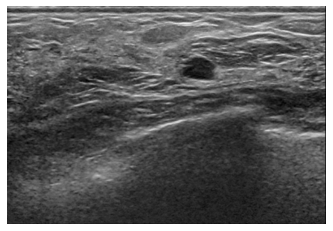

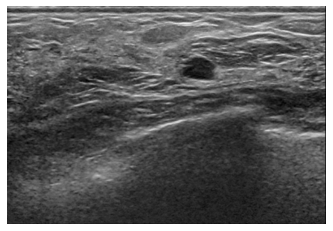

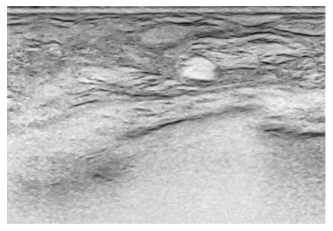

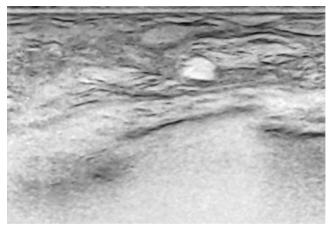

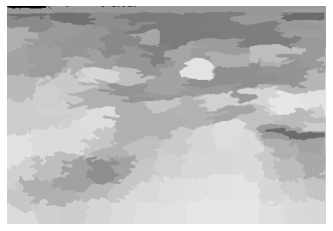

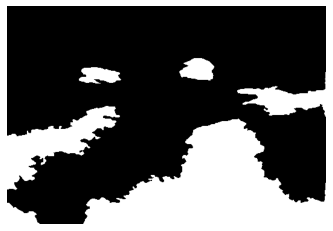

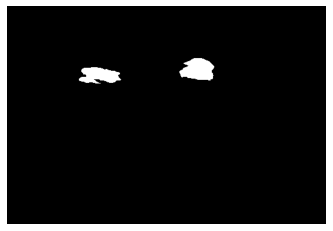

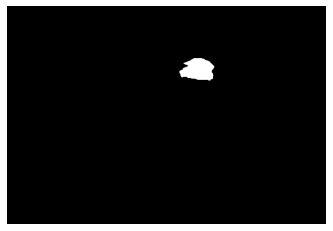

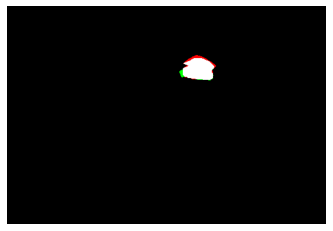

File #2 of 14 Processing...


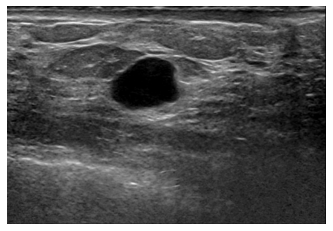

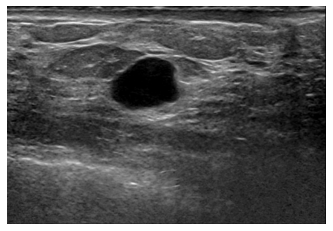

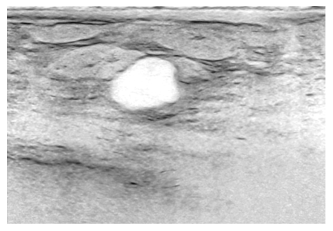

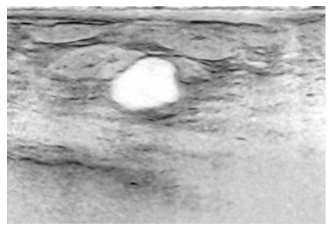

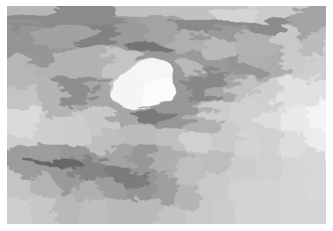

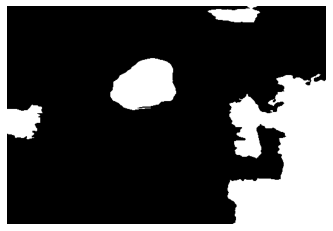

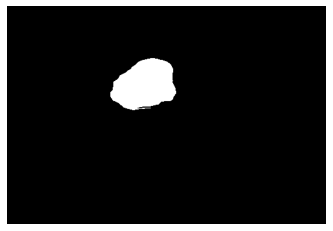

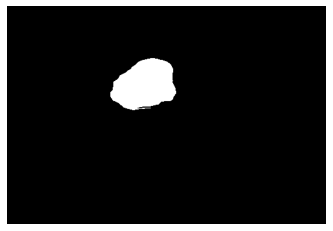

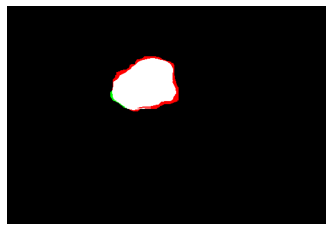

File #3 of 14 Processing...


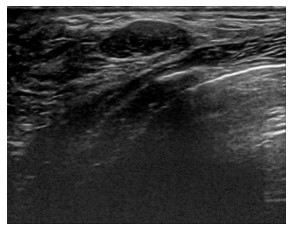

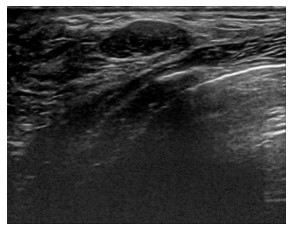

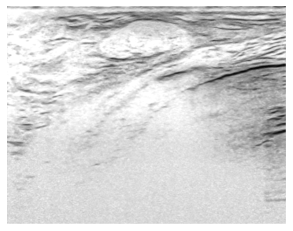

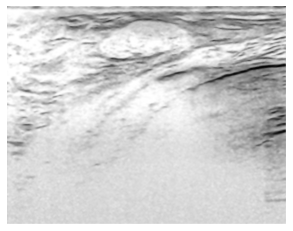

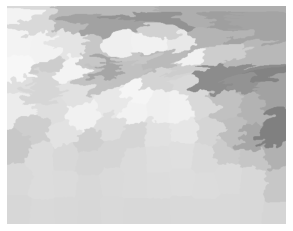

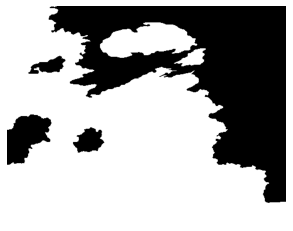

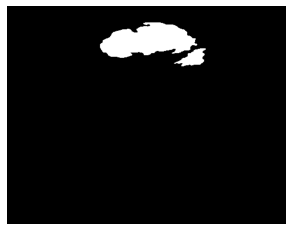

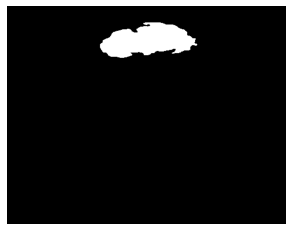

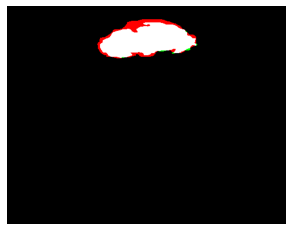

File #4 of 14 Processing...


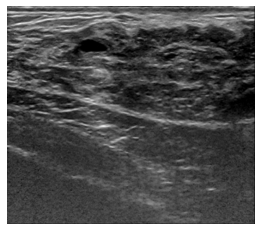

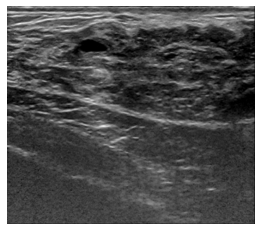

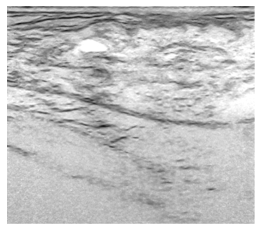

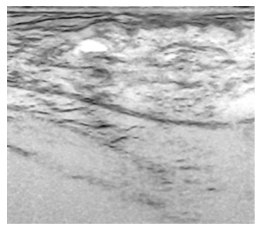

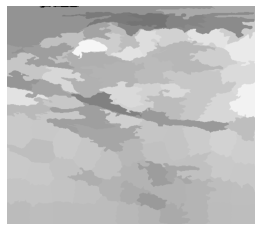

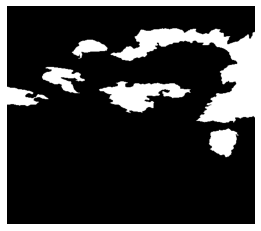

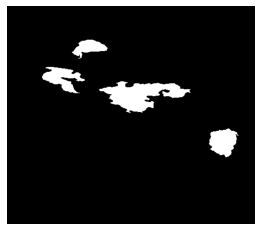

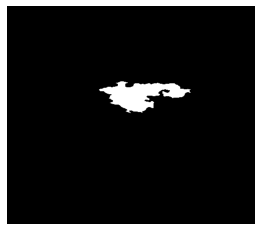

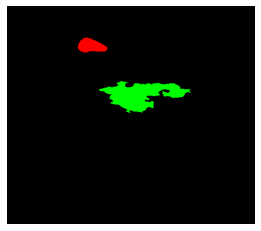

File #5 of 14 Processing...


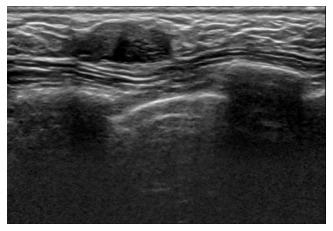

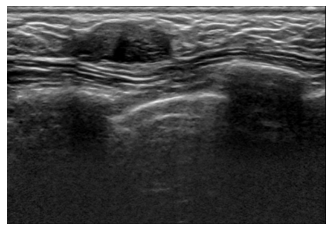

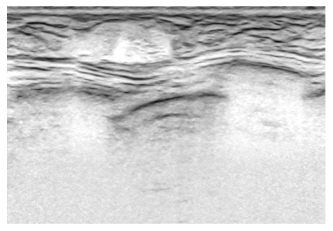

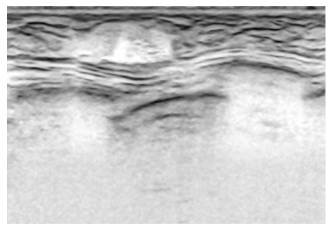

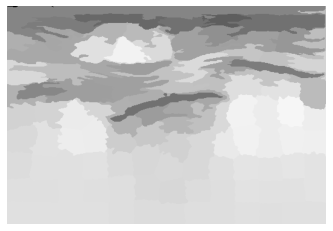

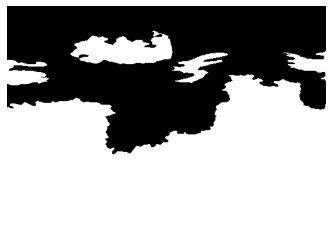

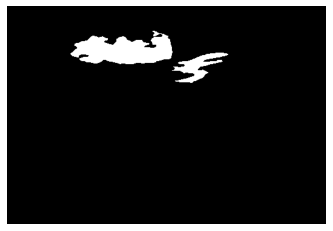

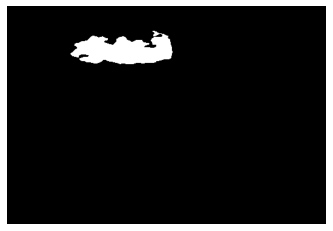

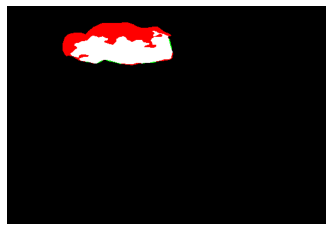

File #6 of 14 Processing...


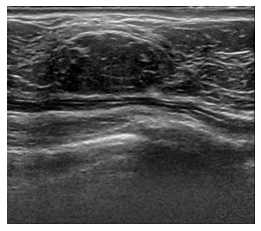

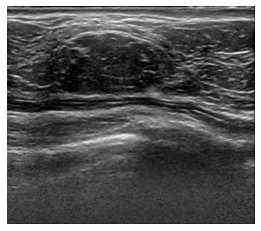

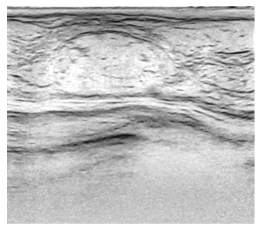

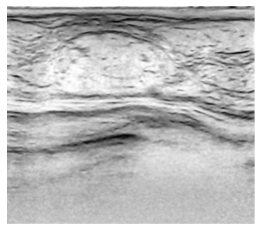

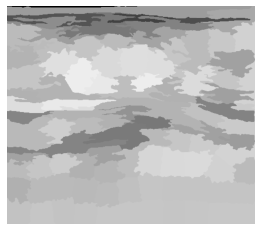

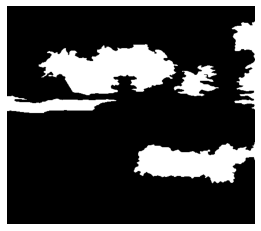

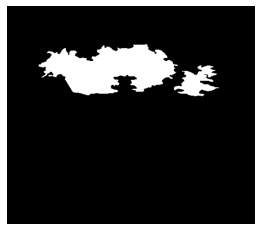

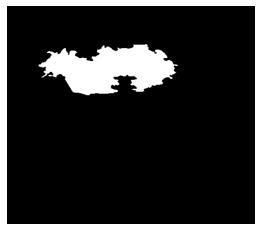

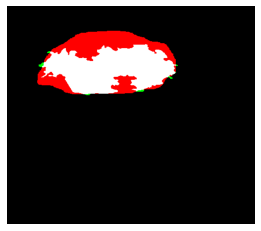

File #7 of 14 Processing...


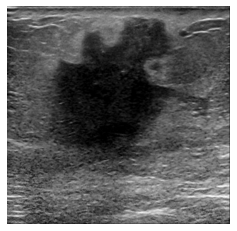

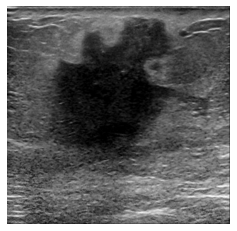

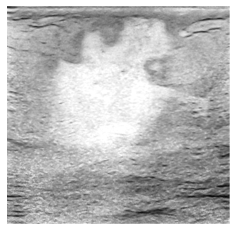

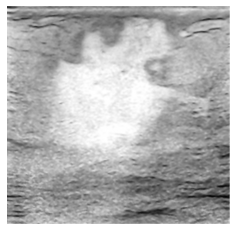

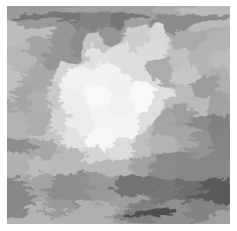

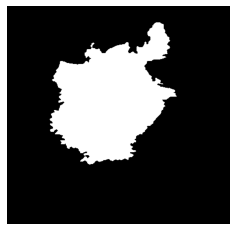

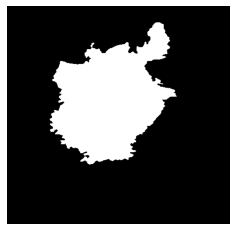

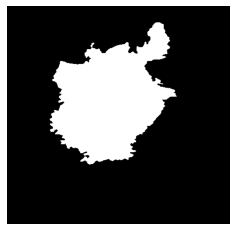

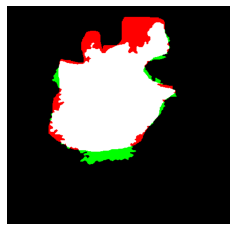

File #8 of 14 Processing...


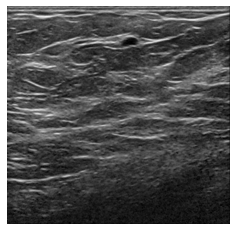

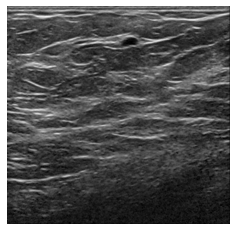

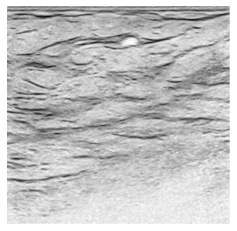

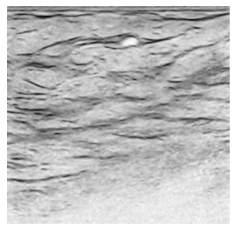

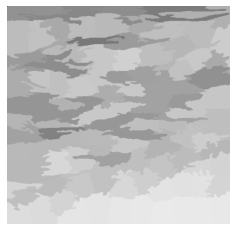

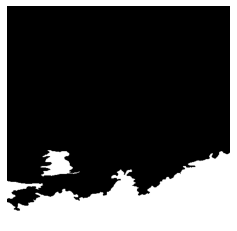

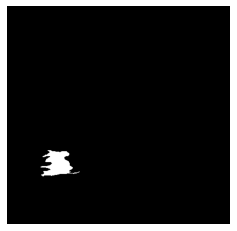

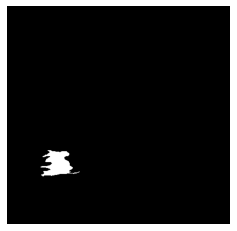

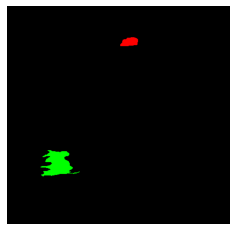

File #9 of 14 Processing...


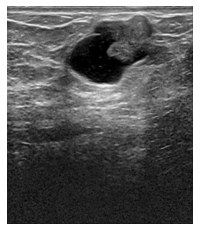

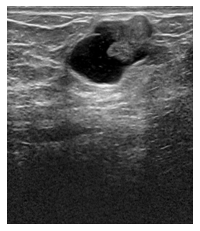

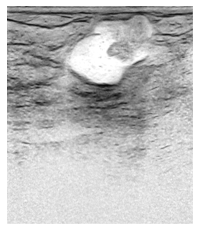

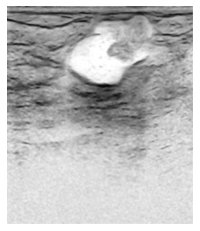

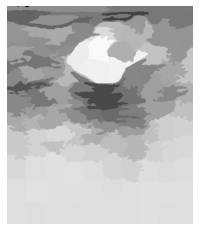

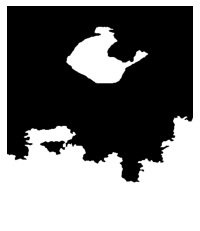

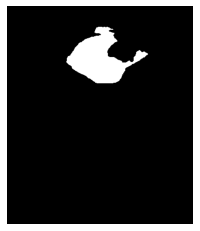

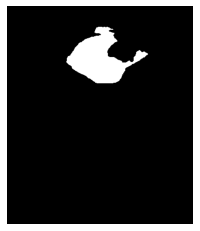

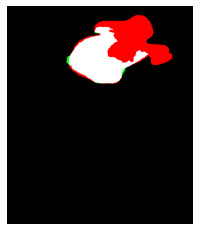

File #10 of 14 Processing...


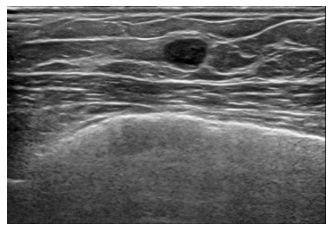

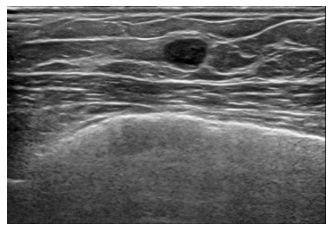

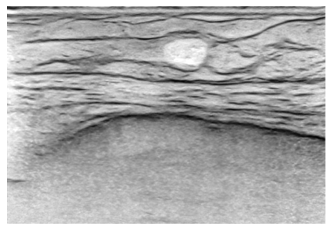

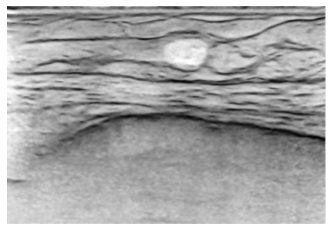

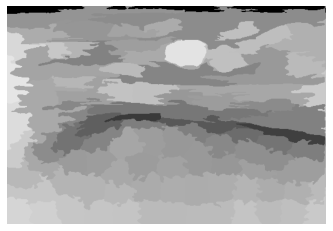

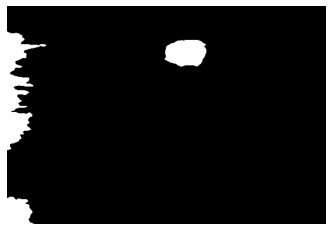

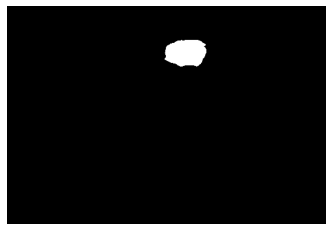

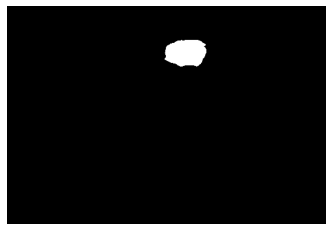

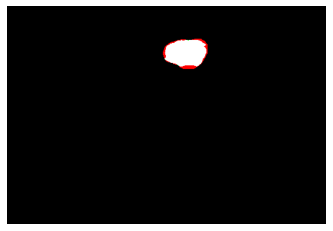

File #11 of 14 Processing...


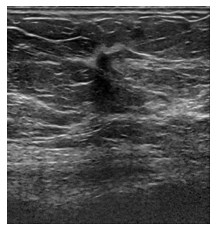

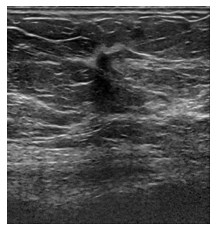

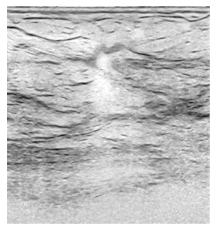

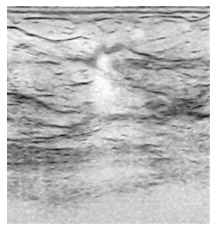

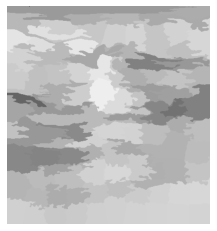

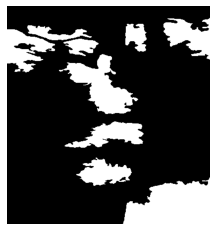

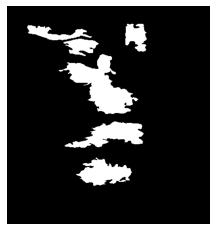

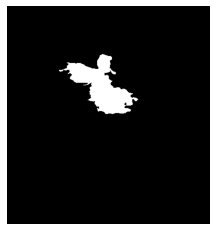

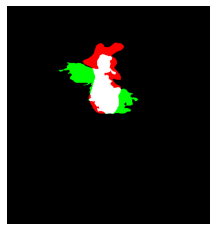

File #12 of 14 Processing...


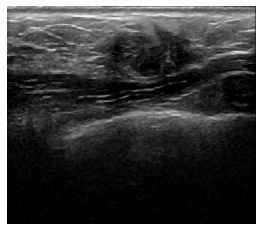

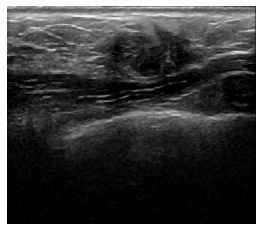

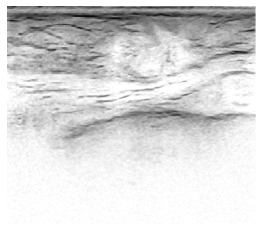

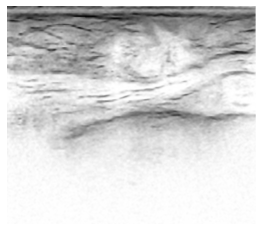

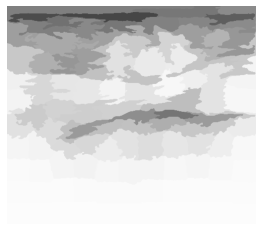

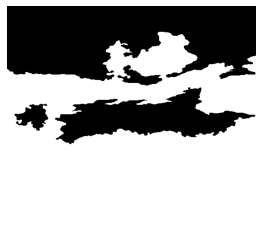

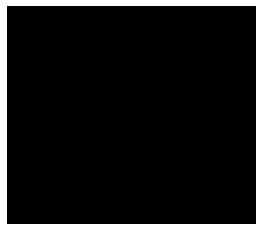

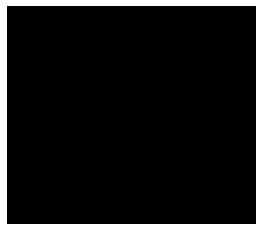

<ipython-input-12-8d9837d89f13>:134: RuntimeWarning: invalid value encountered in longlong_scalars
  statPRC.append(conf_TP[i]/(conf_TP[i]+conf_FP[i]))


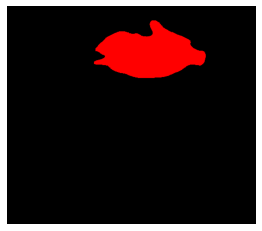

File #13 of 14 Processing...


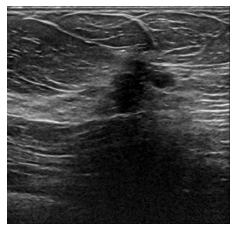

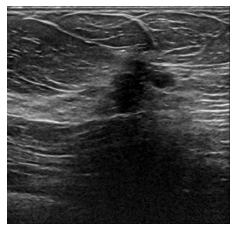

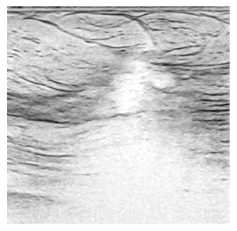

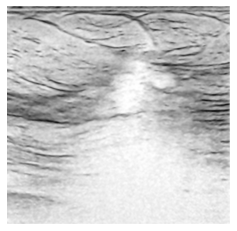

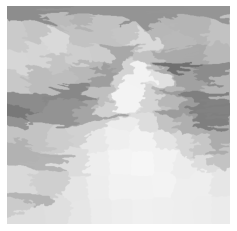

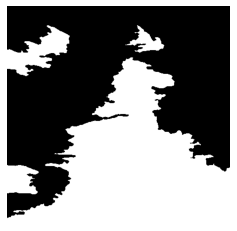

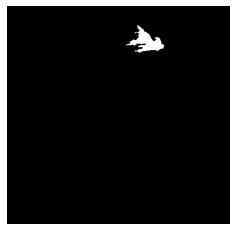

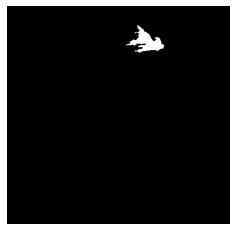

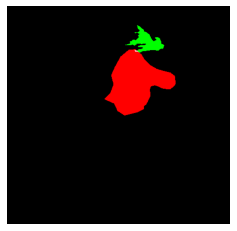

File #14 of 14 Processing...


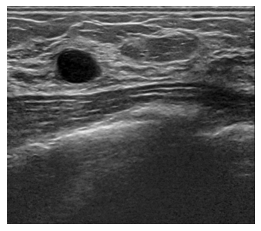

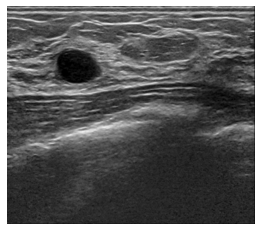

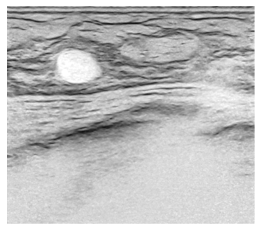

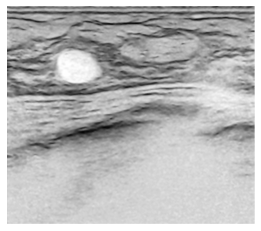

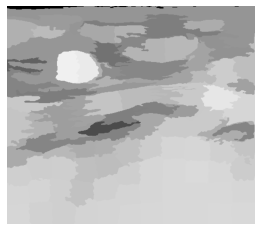

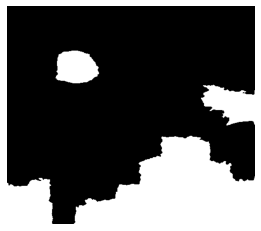

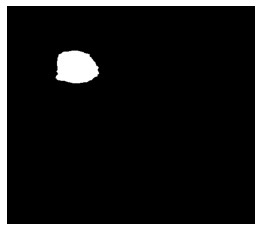

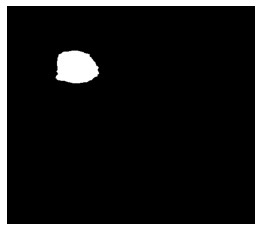

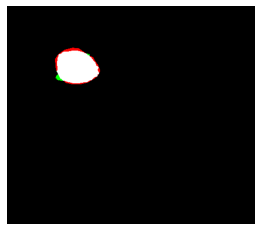

In [ ]:
## Intiallizing Variables
conf_TP,conf_FP,conf_TN,conf_FN,statTPR,statFPR,statTNR,statFNR,statSPC,statDSC,statJAC,statPRC,imgSize,Accuracy,Time=[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]

    
for i in range(len(file_names)):
    
    """ 
    The main For Loop that performs the Pre-processing, Segmentation and Post-Processing for each image
    
    """
    
    ## Start Timer ##
    start = time.time()
    
    ## Split the name and extension for the image 
    file = os.path.join(inputPath, file_names[i])
    realname=os.path.basename(file)
    name,ext = (os.path.splitext(realname))

    print('File #' + str(i+1) + ' of ' + str(len(file_names)) + ' Processing...')
    img = cv2.imread((file),0)
    img = np.array(img)
    imgSize.append(img.size)
    
    PlotSaveImage(img,outputPath,name,'_0Input.jpg')
    
    
    #### PRE-PROCESSING ####
    
    ### Contrast Stretching  
    img = (img - img.min()) / (img.max() - img.min())
    
    PlotSaveImage(img,outputPath,name,'_1Pre1.jpg')


    ### Image Invertion
    img=invert(img)
    PlotSaveImage(img,outputPath,name,'_1Pre2.jpg')



    ### Applying lee-Filter to Inverted Image
    img=lee_filter(img, 4)    
    
    ### Image Enhancement (Egde Enchancement Mainly)

    img=img*255
    im = Image.fromarray(np.uint8(img))
    enhancer = ImageEnhance.Sharpness(im)

    factor = 1
    im_s_1 = enhancer.enhance(factor)
    img=im_s_1
    img=np.array(img)
    
    PlotSaveImage(img,outputPath,name,'_1Pre3.jpg')
 
    
    ### Normalizing Image
    img=img/img.max()
    
    
    #### SEGMENTATION ####
    
    ### Apply Slic Segmentation which segments image using k-means clustering in Color-(x,y,z) space.

    labels1 = segmentation.slic(img, compactness=0.101, n_segments=110,
                            start_label=1, sigma=1)
    ### Coloring the Segements
    out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)
    
    PlotSaveImage(out1,outputPath,name,'_2Seg.jpg')





    ########## POST-PROCESSING  ########

    ##### THRESHOLDING #####
    
    out1[out1>=0.82]=1
    out1[out1<0.82]=0
    
    img=out1
    PlotSaveImage(img,outputPath,name,'_3Post1.jpg')

    
    
    
    ##### IMCLEAR BORDER HERE #####
    
    img_floodfill=IMclear_Border(img)

    PlotSaveImage(img_floodfill,outputPath,name,'_3Post2.jpg')

    
    
    #### GET REGION WITH MAX AREA(LESION) ####
    
    img_floodfill=GetMaxAreaRegion(img_floodfill)
    img=img_floodfill
    
    PlotSaveImage(img_floodfill,outputPath,name,'_3Post3.jpg')

 
    
    ###### STATISTICS #########

    img=np.double(img)
    GTimg = cv2.imread((os.path.join(gtPath, name+ext)),0)
    img=img/255
    GTimg=GTimg/255
    
    P=np.count_nonzero(GTimg == 1)
    N=np.count_nonzero(GTimg != 1)

    TN, FP, FN, TP = confusion_matrix(GTimg.ravel(), img.ravel()).ravel()
    conf_TP.append(TP)
    conf_TN.append(TN)
    conf_FP.append(FP)
    conf_FN.append(FN)
    Acc=(TP+TN)/(TP+TN+FP+FN)
    Accuracy.append(Acc)
    
    
    statTPR.append(conf_TP[i]/P)
    statFPR.append(conf_FP[i]/N)
    statFNR.append(conf_FN[i]/P)
    statTNR.append(conf_TN[i]/N)
    statSPC.append(1-statFPR[i])
    statDSC.append(2*conf_TP[i]/(2*conf_TP[i]+conf_FP[i]+conf_FN[i]))
    statJAC.append(conf_TP[i]/(conf_TP[i]+conf_FP[i]+conf_FN[i]))
    statPRC.append(conf_TP[i]/(conf_TP[i]+conf_FP[i]))

    if(statPRC[i] == None):
        statPRC[i]=0
    
    ###### PlotAnnotations #########
 
    Overlay=PlotAnnotations_General(GTimg,img)
    Overlay=Overlay.astype('uint8')
    
    PlotSaveImage(Overlay,outputPath,name,'_4Out.jpg')

    ## Stop Timer
    stop = time.time()
    Time.append(stop-start)

# More Statistics

In [ ]:
avgTPR = np.mean(statTPR)
avgFPR = np.mean(statFPR)
avgFNR = np.mean(statFNR)
avgTNR = np.mean(statTNR)
avgSPC = np.mean(statSPC)
avgDSC = np.mean(statDSC)
avgJAC = np.mean(statJAC)
avgPRC = np.mean(statPRC)
avgTime = np.mean(Time)
avgAccuracy = np.mean(Accuracy)


avgConf_TP = np.mean([i / j for i, j in zip(conf_TP, imgSize)])
avgConf_FP = np.mean([i / j for i, j in zip(conf_FP, imgSize)])
avgConf_TN = np.mean([i / j for i, j in zip(conf_TN, imgSize)])
avgConf_FN = np.mean([i / j for i, j in zip(conf_FN, imgSize)])

stdTPR = np.std(statTPR)
stdFPR = np.std(statFPR)
stdSPC = np.std(statSPC)
stdDSC = np.std(statDSC)
stdJAC = np.std(statJAC)
stdPRC = np.std(statPRC)
stdFNR = np.std(statFNR)
stdTNR = np.std(statTNR)
stdTime = np.std(Time)
stdAccuracy = np.std(Accuracy)

stdConf_TP = np.std([i / j for i, j in zip(conf_TP, imgSize)])
stdConf_FP = np.std([i / j for i, j in zip(conf_FP, imgSize)])
stdConf_TN = np.std([i / j for i, j in zip(conf_TN, imgSize)])
stdConf_FN = np.std([i / j for i, j in zip(conf_FN, imgSize)])

AccuracyTotal= (np.sum(conf_TP)+np.sum(conf_TN))/(np.sum(conf_TP)+np.sum(conf_TN)+np.sum(conf_FP)+np.sum(conf_FN))

# Creating Statistics Table  

In [ ]:
Dataframe=pd.DataFrame({'Image':file_names,'Accuracy': Accuracy,'Jaccard': statJAC,'Dice': statDSC,'TPR': statTPR,'TNR': statTNR,'FPR': statFPR,'FNR': statFNR,'Time(sec)': Time})
Dataframe.index += 1
df2 = pd.DataFrame([["Mean",avgAccuracy, avgJAC,avgDSC ,avgTPR,avgTNR,avgFPR,avgFNR,avgTime]],columns=list(Dataframe.columns))
Dataframe=Dataframe.append(df2,ignore_index=True)
df3 = pd.DataFrame([["St Dev",stdAccuracy, stdJAC,stdDSC ,stdTPR,stdTNR,stdFPR,stdFNR,stdTime]],columns=list(Dataframe.columns))
Dataframe=Dataframe.append(df3,ignore_index=True)

In [ ]:
Dataframe

Image  Accuracy   Jaccard      Dice       TPR       TNR       FPR  \
0   000001.png  0.998569  0.845279  0.916153  0.883472  0.999597  0.000403   
1   000002.png  0.994055  0.854099  0.921309  0.863239  0.999550  0.000450   
2   000007.png  0.991312  0.807985  0.893796  0.814106  0.999644  0.000356   
3   000010.png  0.968336  0.000000  0.000000  0.000000  0.973761  0.026239   
4   000011.png  0.977930  0.581003  0.734980  0.586096  0.999517  0.000483   
5   000014.png  0.950817  0.616389  0.762674  0.620494  0.999028  0.000972   
6   000018.png  0.947213  0.789286  0.882236  0.843498  0.978970  0.021030   
7   000019.png  0.986585  0.000000  0.000000  0.000000  0.989077  0.010923   
8   000022.png  0.947431  0.497225  0.664196  0.501253  0.999063  0.000937   
9   000023.png  0.997743  0.851762  0.919948  0.852941  0.999979  0.000021   
10  000025.png  0.967317  0.435357  0.606619  0.621633  0.981922  0.018078   
11  000030.png  0.927925  0.000000  0.000000  0.000000  1.000000  0.000000   
12  000031.png  0.939836  0.001171  0.002340  0.001362  0.991088  0.008912   
13  000032.png  0.996947  0.868760  0.929771  0.886920  0.999513  0.000487   
14        Mean  0.970858  0.510594  0.588144  0.533930  0.993622  0.006378   
15      St Dev  0.023542  0.348919  0.383998  0.357488  0.008822  0.008822   

         FNR  Time(sec)  
0   0.116528   1.638357  
1   0.136761   1.627321  
2   0.185894   1.746063  
3   1.000000   1.744636  
4   0.413904   1.614239  
5   0.379506   1.754513  
6   0.156502   1.584303  
7   1.000000   1.620210  
8   0.498747   1.346751  
9   0.147059   1.807557  
10  0.378367   1.598227  
11  1.000000   1.853557  
12  0.998638   1.714080  
13  0.113080   1.830871  
14  0.466070   1.677192  
15  0.357488   0.126381

In [ ]:
#Saving the table as excel file 
Dataframe.to_csv('Data.csv',index=False)